# Centroidal Voronoi tessellation

In [1]:
# Import matplotlib and numpy modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Import the Swarm class from NeSSI
from nessi.globopt import Swarm

In [2]:
def peaksF(X, Y):
    F = 3.*(1.-X)*(1.-X)\
                *np.exp(-1.*X**2-(Y+1.)**2)\
                -10.*(X/5.-X**3-Y**5)\
                *np.exp(-1.*X**2-Y**2)\
                -1./3.*np.exp(-1.*(X+1)**2-Y**2)

    return F

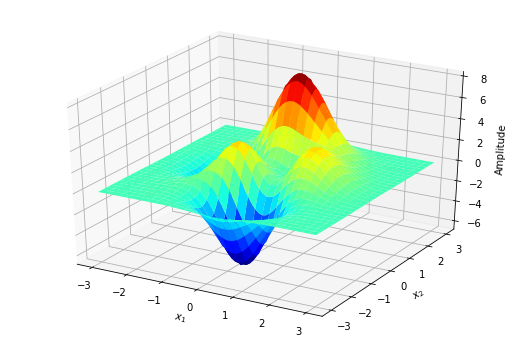

In [3]:
# Initialize 3D plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x_{1}$')
ax.set_ylabel(r'$x_{2}$')
ax.set_zlabel(r'Amplitude')

# Calculate peak function
X, Y = np.meshgrid(np.linspace(-3, 3, 61), np.linspace(-3, 3, 61))
F = peaksF(X, Y)

# Plot
ax.plot_surface(X, Y, F, vmin=-6.0, vmax=8.0, cmap='jet');

The search-space is delimited by the minimum and maximum values of each parameter (x1 and x2 in this case). An increment value (dx) is added to control the maximum displacement of the swarm's particles.

| x1 min | x1 max | dx1 | x2 min | x2 max | dx2 |
| ------ | ------ | --- | ------ | ------ | --- |
| -3.0   | 3.0    | 0.3 | -3.0   | 3.0    | 0.3 |

In [4]:
# Initialize the swarm object
swarm1 = Swarm()
swarm2 = Swarm()

# PSO/GA parameters
ngen = 100
nindv = 20
fit = np.zeros((ngen+1, 2), dtype=np.float32)

# Get the search-space
# Alternatively, the search space can be loaded from a text file using the function
#     swarm.init_pspace('name_of_the_file')
# The file must be formatted as follow:
# - one line per point
# - for each line: x1min, x1max, dx1, ..., xNmin, xNmax, dxN
# - comments='#'
# Here, only one point is searched: the one for which the two parameters (X, Y) 
# gives the minimum value of the 2D peak function.
swarm1.pspace = np.array([[[-3.0, 3.0, 0.3],
                          [-3.0, 3.0, 0.3]]], 
                        dtype=np.float32)
swarm2.pspace = np.array([[[-3.0, 3.0, 0.3],
                          [-3.0, 3.0, 0.3]]], 
                        dtype=np.float32)

In [15]:
# Initialize particles without CVT
np.random.seed(0) # Initialize the seed to have the same intial particles in case 1 & 2
swarm1.init_particles(nindv)
# Initialize particles with CVT
np.random.seed(0) # Initialize the seed to have the same intial particles in case 1 & 2
swarm2.init_particles(nindv, ncvt=1000)

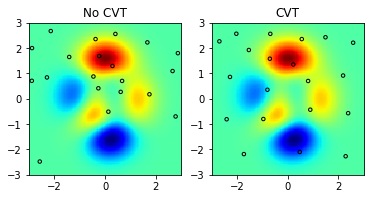

In [32]:
# Prepare output
X = np.linspace(-3., 3., 121)
Y = np.linspace(-3., 3., 121)
fmap = np.zeros((len(X), len(Y)), dtype=np.float32)
for iy in range(0, len(Y)):
    for ix in range(0, len(X)):
        fmap[ix, iy] = peaksF(X[ix], Y[iy])
plt.subplot(121)
plt.xlim(X[0], X[-1])
plt.ylim(Y[0], Y[-1])
plt.title('No CVT')
plt.imshow(fmap.swapaxes(0,1), extent=[X[0], X[-1], Y[0], Y[-1]], cmap='jet', origin='bottom-left')
plt.scatter(swarm1.current[:,0,0], swarm1.current[:,0,1], s=12, facecolors='none', edgecolors='black')
plt.subplot(122)
plt.xlim(X[0], X[-1])
plt.ylim(Y[0], Y[-1])
plt.title('CVT')
plt.imshow(fmap.swapaxes(0,1), extent=[X[0], X[-1], Y[0], Y[-1]], cmap='jet', origin='bottom-left')
plt.scatter(swarm2.current[:,0,0], swarm2.current[:,0,1], s=12, facecolors='none', edgecolors='black')
plt.show()